In [77]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast

In [173]:
#Load Dataset
data = pd.read_csv('/kaggle/input/superheroes-nlp-dataset/superheroes_nlp_dataset.csv')
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Lets take a look at data about how it is:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1300 non-null   object 
 2   full_name                         954 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1084 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

#### 1) How would you define most powerful superhero from the information available in dataset?
a. Who is the most powerful superhero from each creator?

**Solution Explantion:** Looking at the data we can use overall score to determine most powerful Heros. But this column has infinity and '-' as two of the values.
So first we have to remove these two values to integer numbers and then sort them.
Below I have replaced infinity with 1000 and - with zero and converted the column to interger.

We can also see that multiple heros from same creator has infinity score so how should we decide which one is more powerful for that purpose we have counted the super powers each hero has and sum of their skills.

Now to find out the most powerful hero we will sort by overall score, Skill score, superpower count.

In [57]:
skill_scores  = ['intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score']

In [58]:
super_powers_columns = ['has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'has_energy_absorption',
       'has_cold_resistance', 'has_magic', 'has_telekinesis',
       'has_toxin_and_disease_resistance', 'has_telepathy', 'has_regeneration',
       'has_immortality', 'has_teleportation', 'has_force_fields',
       'has_energy_manipulation', 'has_endurance', 'has_longevity',
       'has_weapon-based_powers', 'has_energy_blasts', 'has_enhanced_senses',
       'has_invulnerability', 'has_stealth', 'has_marksmanship', 'has_flight',
       'has_accelerated_healing', 'has_weapons_master', 'has_intelligence',
       'has_reflexes', 'has_super_speed', 'has_durability', 'has_stamina',
       'has_agility', 'has_super_strength']
print(len(powers))

50


In [14]:
# Count the number of superpowers a heros has.
data['superpowers_sum'] = data[powers].sum(axis=1)

# Sum the skill score to get over all score of skills.
data['skill_scores_sum'] = data[skill_scores].sum(axis=1)

# replace - to 0 and infinity to 1000 and change the column to numeric to sort it.
data['overall_score'] = data[['overall_score']].replace('-', 0).replace('∞', '1000')
data['overall_score'] = pd.to_numeric(data['overall_score'])

In [46]:
output_column = ['name', 'real_name', 'full_name','creator','overall_score','superpowers_sum','skill_scores_sum']

#### 1.a. Who is the most powerful superhero from each creator?

Below Table displays most powerful hero from each creator.

In [48]:
# Most strengthful hero from each creator
data[output_column].sort_values(by = ['overall_score','skill_scores_sum','superpowers_sum'], ascending = False).groupby(['creator']).head(1)

,name,real_name,full_name,creator,overall_score,superpowers_sum,scores_sum
1337,True Form Oblivion,Oblivion,Oblivion,Marvel Comics,1000,34.0,600
882,Michael Demiurgos,Michael Demiurgos,Michael Demiurgos,DC Comics,1000,31.0,600
845,Man Of Miracles,Mother Of Existence,Mother Of Existence,Image Comics,1000,21.0,600
450,Eru Iluvatar,Eru,NaN,J. R. R. Tolkien,1000,10.0,600
1289,The Lord Of Light,R'hllor,NaN,George R. R. Martin,1000,9.0,600
393,Devilman,Akira Fudo,Akira Fudo,Shueisha,229,39.0,580
527,Golden Ninja,Lloyd Garmadon,LLoyd Montgomery Garmadon,Lego,226,35.0,600
421,Dracula,Vlad Tepes Dracula,Vlad Tepes Dracula,Konami,211,36.0,575
1348,Unicron,Unicron,Unicron,Hasbro,146,30.0,565
362,Darth Nihilus,Unknown,Unknown,George Lucas,84,22.0,370


#### 2) Find the top 5 superpowers in descending order.

**Solution Explanation:** Below the the list of top 5 superpowers based on how many heros posses these super powers.

In [12]:
# Top 5 super powers
data[powers].sum().sort_values(ascending=False)[:5]

has_agility           778.0
has_stamina           737.0
has_super_strength    731.0
has_durability        708.0
has_intelligence      599.0
dtype: float64

#### 3) Which race has the most immortal superheroes?

**Solution Explanation:** To find out races with most immortal superheros, we have grouped by race and counted the heros who are immortals.

Answer is: God/Eternal

In [70]:
#Which race has the most immortal superheroes?
immportal_hero_count = data[['type_race','has_immortality']].groupby('type_race').agg('sum').sort_values(by='has_immortality',ascending=False)
immportal_hero_count['has_immortality']

type_race
God / Eternal    36.0
Human            29.0
Demon            18.0
New God          11.0
Cosmic Entity     8.0
                 ... 
Alpha             0.0
Human-Spartoi     0.0
Human-Inhuman     0.0
Frost Giant       0.0
Human-Vulcan      0.0
Name: has_immortality, Length: 67, dtype: float64

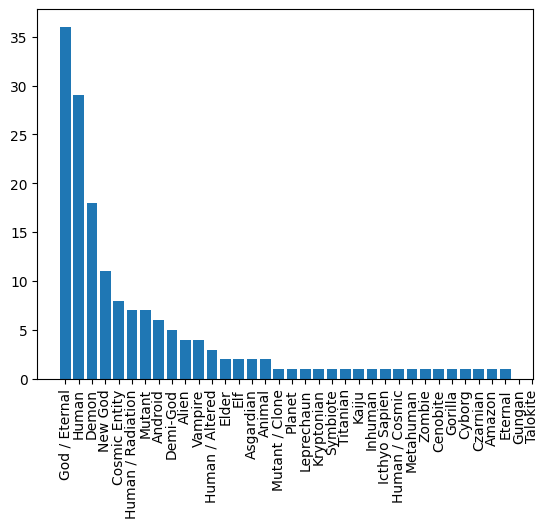

In [72]:
# Bar chart to display immortal heros for each race.
immportal_hero_count=immportal_hero_count[immportal_hero_count>0]
plt.bar(immportal_hero_count['has_immortality'].index,immportal_hero_count['has_immortality'].values)
plt.xticks(rotation='vertical')
plt.show()

#### 4) Name the creator having most superheroes of type “Parademon”.

**Answer Explanation:** DC Comics has only one Hero as Parademon.

In [73]:
data[data['type_race'] == 'Parademon'][['creator']].value_counts()

creator  
DC Comics    1
Name: count, dtype: int64

#### 5) Which comic creator has most superhero teams?

**Solution Explanation:**  Below code fid outs teams for each creator.

as per below List we can see Marvel Comics has 165 Teams.

In [78]:
#Which comic creator has most superhero teams?
creator_teams = {}
for creator in data['creator'].unique():
    for team in data[data['creator'] == creator]['teams']:
        if len(team)>=0:
            team = set(ast.literal_eval(team))
            if creator in creator_teams:
                creator_teams[creator].update(team)
            else:
                creator_teams[creator] = team

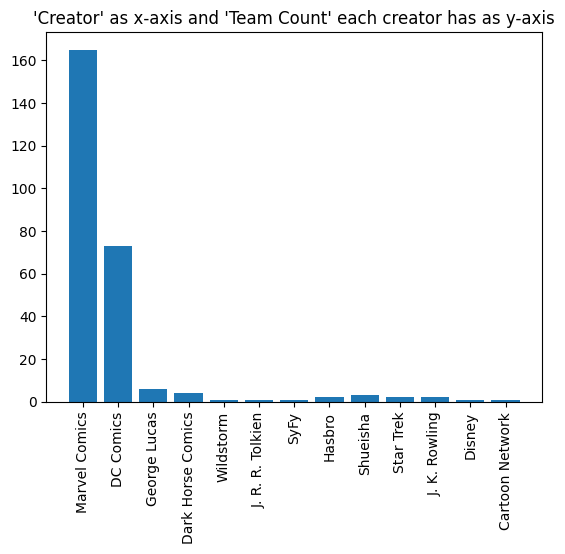

In [90]:
# creator_teams
creator_team_count ={}
for key,val in creator_teams.items():
    creator_team_count[key]= len(val)
creator_team_count = pd.Series(creator_team_count)
creator_team_count = creator_team_count[creator_team_count>0]

plt.bar(creator_team_count.index,creator_team_count.values)
plt.xticks(rotation='vertical')
plt.title("'Creator' as x-axis and 'Team Count' each creator has as y-axis")
plt.show()

#### 5.a. Find names, real names and alias of superhero who is part of most teams.

**Solution Explanation:**  Wolverine belongs to most of the teams.

In [91]:
data['teams_count'] = data['teams'].apply(lambda x: len(set(ast.literal_eval(x))))

In [93]:
#Heros who belongs to most of the teams
data[['name','real_name','aliases','teams','teams_count']].sort_values(by='teams_count', ascending=False)

,name,real_name,aliases,teams,teams_count
1415,Wolverine,Logan,"['Weapon X, Weapon Ten, Death, Mutate 9601, Ji...","['X-Force', 'X-Men', 'Weapon X', 'Secret Defen...",16
370,Deadpool,Wade Wilson,"['Wade Wilson, Jack, Chiyonosake (""the Wolf of...","['Deadpool Corps', 'Agency X', 'X-Force', 'Dee...",14
616,Hulk,Bruce Banner,"['Annihilator, Captain Universe, Joe Fixit, Mr...","['The Mighty Avengers', 'Agency X', 'Contingen...",13
824,Luke Cage,Luke Cage,"['Carl Lucas, Power Man, Mark Lucas, Hero for ...","['Mighty Avengers', 'New Avengers', 'Defenders...",10
407,Doctor Strange (Classic),Stephen Strange,"['Sorcerer Supreme, Master of the Mystic Arts,...","['Defenders', 'Neo-Knights', 'The Mighty Aveng...",10
...,...,...,...,...,...
651,Iron Man (Wild West),Tony Stark,[''],[],0
653,Iron Monger (MCU),Obadiah Stane,['Obie'],[],0
655,IT,Pennywise the Dancing Clown,"['Robert Gray, Bob Gray']",[],0
656,Itachi Uchiha,Uchiha Itachi,"['Itachi of the Sharingan, Clan Killer Itachi']",[],0


#### b. Are there any crossovers between creators and teams?

**Solution Explanation:** As per below exploration we can see :
1. Cross Over Between Creator: Marvel Comics & DC Comics of Team 'Titans'.
2. Cross Over Between Creator: Dark Horse Comics & Disney of Team 'Incredible Family'

In [21]:
for key1, val1 in creator_teams.items():
    for key2, val2 in creator_teams.items():
        if key1 != key2:
            cross_over = val1.intersection(val2)
            if len(cross_over)>0:
                print("Cross Over Between Creator: {} & {}".format(key1, key2), len(cross_over), cross_over)

Cross Over Between Creator: Marvel Comics & DC Comics 1 {'Titans'}
Cross Over Between Creator: DC Comics & Marvel Comics 1 {'Titans'}
Cross Over Between Creator: Dark Horse Comics & Disney 1 {'Incredible Family'}
Cross Over Between Creator: Disney & Dark Horse Comics 1 {'Incredible Family'}


#### 6. What are the characteristics that can predict a superhero alignment?


In [159]:
data['alignment']

0       Good
1        NaN
2       Good
3       Good
4       Good
        ... 
1445    Good
1446    Good
1447     Bad
1448     Bad
1449     Bad
Name: alignment, Length: 1450, dtype: object

#### 7. From history of superheroes,
**a.** Find list of superheroes having negative past but now aligned positively.
(Negativity of past can be decided by multiple methods, please use which is
familiar to you)

**Solution Explaination:** We will use NLP emotion detection from hugging face for each sentence in history. We will track the change in emotion in history from one sentence to another to find out emotional change hero went through.

We will be detecting below emotions:

    (-ve) anger 🤬
    (-ve) disgust 🤢
    (-ve) fear 😨
    (+ve) joy 😀
          neutral 😐
    (-ve) sadness 😭
          surprise 😲


Below code is taking long time to find out emotions for each sentence for whole data. so we have run it for only 10 heros.

For 10 heros we can see that some of them are started with negative emotions and other with neutral emotions.

In [94]:
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import pipeline

In [95]:
pipe = pipeline("text-classification", model = "j-hartmann/emotion-english-distilroberta-base")

In [98]:
i=0
heros_history_emotions=[]
for text in data['history_text']:
    emotions=[]
    try:
        for sent in sent_tokenize(text):
#             pass
            sentiment = pipe(text[:540])
            emotions.append(sentiment[0]['label'])
    except:
        emotions.append("None")
    heros_history_emotions.append(emotions)
    i+=1
    if i>10:
        break

In [193]:
# Heros emotions as per History Text.
print(heros_history_emotions)

[['sadness', 'sadness', 'sadness', 'sadness', 'sadness'], ['fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear'], ['anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger'], ['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutr

In [101]:
# data['history_emotion'] = heros_history_emotions

**b.** Extract patterns from superhero history for each creator.

**Solution Explanation:** Check if Heros from same creator went through same emotion changes.

#### 8. Report on the 10 superheroes with most relatives, status of those relatives where possible, and the alignment of those superheroes.

**Solution Explanation:** Below is the list of heros with most of no of relatives.

In [151]:
def process_relatives(rel):
    rel = re.split(r'\)[;,]+',rel)
    return rel

data['relatives'].fillna("", inplace= True)
data['rel_list'] = data['relatives'].apply(lambda x:process_relatives(x))
data['rel_count'] = data['rel_list'].apply(lambda x :len(x))

In [160]:
data[['full_name','alignment','rel_list','rel_count']].sort_values(by='rel_count', ascending =False)[:10]

,full_name,alignment,rel_list,rel_count
936,Namor McKenzie,Good,"[Elanna (maternal ancestor, Tanas (maternal a...",45
75,Orin,Good,"[Koryak (son, Arthur Curry, Jr. (son, A.J. (...",36
574,Alexander Summers,Good,[Oscar Summers (adoptive paternal distant ance...,32
1100,Damian Wayne,Good,"[Talia al Ghul (mother, \nBruce Wayne (Batman,...",21
340,Scott Summers,Good,[Oscar Summers (adoptive paternal distant ance...,20
515,Jonathon Blaze,Good,"[Illyana Kale (maternal ancestor, deceased, D...",18
121,Helmut J. Zemo,Bad,"[Harbin Zemo (distant ancestor, deceased, \nHa...",18
1251,Kara Zor-El,Good,"[Zor-El (father, Allura In-Ze (mother, Jor-E...",17
750,NaN,Bad,"[A'Lars (father, deceased, \nSui-San (mother, ...",16
637,Robert Bruce Banner,Bad,"[Bruce Banner I (paternal grandfather, presume...",15


#### 9) Find out any other interesting insights from given data.
a. Which 3 comic characters can you recommend to your friends to read or
watch?

**Solution Explanation:**
1) Friend having interest in Indian Origin super Heros can bee suggested Below Two Heros series.<br>
2) Friend having interest in Music can be suggested superheros with Ocuupation Musician.

In [191]:
# Super Heros with Place of birth as India
data['place_of_birth'].fillna('', inplace=True)
data[data['place_of_birth'].apply(lambda x : 'india' in x.lower())]

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
726,Kathryn Janeway,Kathryn Janeway,Kathryn M. Janeway,6,Janeway notable for being the first female of ...,NaN,90,10,20,25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
908,Mohinder Suresh,Mohinder Suresh,Mohinder Suresh,-,Dr. Mohinder Suresh is a genetics professor fr...,Mohinder has acquired an ability by injecting...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [192]:
# Occupation as Musician
data['occupation'].fillna('', inplace=True)
data[data['occupation'].apply(lambda x : 'musician' in x.lower())]

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
182,Black Cat (Earth 65),Felicia Hardy,NaN,7,Felicia Hardy and her father were two French t...,NaN,90,15,35,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1066,Red Arrow,Roy Harper,"Roy William Harper, Jr.",5,Red Arrow is the current superhero identity of...,Red Arrow possesses no superhuman attribute...,80,15,25,20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1159,Sherlock Holmes,Sherlock Holmes,Sherlock Holmes,10,Details about Sherlock Holmes' life are scarce...,Knowledge of Literature – nil. Knowledge of Ph...,100,35,30,35,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
